## Main Objective
The Main objective of this A/B testing is to examine what happens when the first gate in the game was moved from level 30 to level 40!  
When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

### Data Understanding
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. **userid**: A unique number that identifies each player.
2. **version**: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
3. **sum_gamerounds**: the number of game rounds played by the player during the first 14 days after install.
4. **retention_1**: Did the player come back and play 1 day after installing?
5. **retention_7**: Did the player come back and play 7 days after installing?  

When a player installed the game, he or she was randomly assigned to either.  
The dataset can be accessed at: [https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats/data]  

### Hypotheses:
**Null Hypothesis $H_0$:** Moving the first gate from level 30 to level 40 does not have any significant impact on player behavior.  
In other words, there is no statistical difference in key metrics (sum_gamerounds, retention_1, and retention_7) between players assigned to gate_30 (control) and gate_40 (treatment).

**Alternative Hypothesis $H_1$:** Shifting the first gate from level 30 to level 40 does lead to a statistically significant impact on player behavior.  
This means that at least one of the metrics (e.g., the number of game rounds played or retention rates) differs between the two groups.

**Main Objective**: The primary objective is to evaluate the impact of changing the first gate’s position on early player metrics, including engagement and retention.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("datasets/cookie_cats.csv")

In [3]:
dataset.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
dataset.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Exploratory Data Analysis
#### Is the distribution of players across the two groups (gate_30 and gate_40) balanced?

In [6]:
group_counts = dataset.groupby('version')['userid'].count()

In [11]:
group_counts.head()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

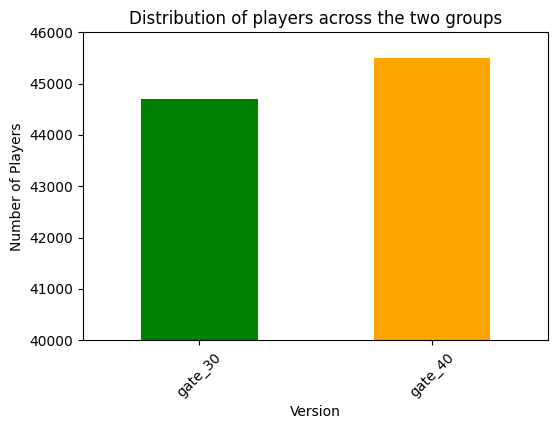

In [10]:
plt.figure(figsize=(6,4))
group_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Version')
plt.ylabel('Number of Players')
plt.title('Distribution of players across the two groups')
plt.xticks(rotation=45)
plt.ylim(40000, 46000)
plt.show()

> Distribution between gate_30 (44,700 players) and gate_40 (45,489 players) is fairly even, we can reasonably assume that randomization was properly executed during the A/B test!  
1. **No major bias in player assignment**: The test groups are comparable in size, meaning any differences in the results are more likely due to the change in gate position rather than an imbalance in sample sizes.
2. **Statistical robustness**: With both groups having large numbers, we can expect our hypothesis tests to have sufficient power to detect meaningful effects.
